In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import time
import dill
import joblib

In [3]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('heart.csv')
data = dataset.values

dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Mirem els valors nulls que te el nostre dataset

print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
# Mirem quants atributs teinm i de quin tipus són els nostres atributs

print("Per visualitzar informació de la BBDD:")
dataset.info()

Per visualitzar informació de la BBDD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Pasem els atributs categòrics a numérics
cnt_sex = dataset['Sex'].value_counts().to_frame()
cnt_chest_pain_type = dataset['ChestPainType'].value_counts().to_frame()
cnt_RestingECG = dataset['RestingECG'].value_counts().to_frame()
cnt_ExerciseAngina  = dataset['ExerciseAngina'].value_counts().to_frame()
cnt_ST_Slope = dataset['ST_Slope'].value_counts().to_frame()
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
dataset.iloc[:,1] = le.fit_transform(dataset.iloc[:,1])
dataset.iloc[:,2] = le.fit_transform(dataset.iloc[:,2])
dataset.iloc[:,6] = le.fit_transform(dataset.iloc[:,6])
dataset.iloc[:,8] = le.fit_transform(dataset.iloc[:,8])
dataset.iloc[:,10] = le.fit_transform(dataset.iloc[:,10])

data = dataset.values


In [7]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [8]:
print("Per veure les estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure les estadístiques dels atributs numèrics de la BBDD:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Escollim com a target l'atribut HeartDisease, ja que volem predir si el pacient tindrà una malaltia cardíaca o no. I, primerament anem a analitzar els atributs categórics en relació a si són diagnosticats de una malaltia cardíaca o no.

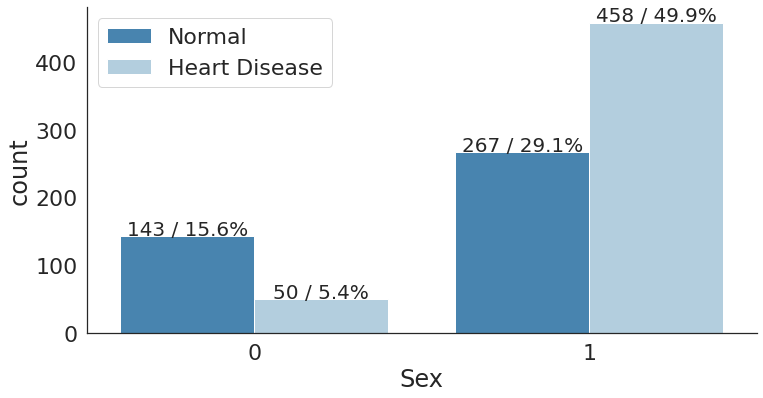

In [9]:
#SEX
# 0:Female, 1:Male
labels = ['Normal','Heart Disease']
total_cnt = dataset['HeartDisease'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=dataset, x='Sex',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

**Observació:**
els homes pateixen de malalties cardíaques més sobint que les dones.

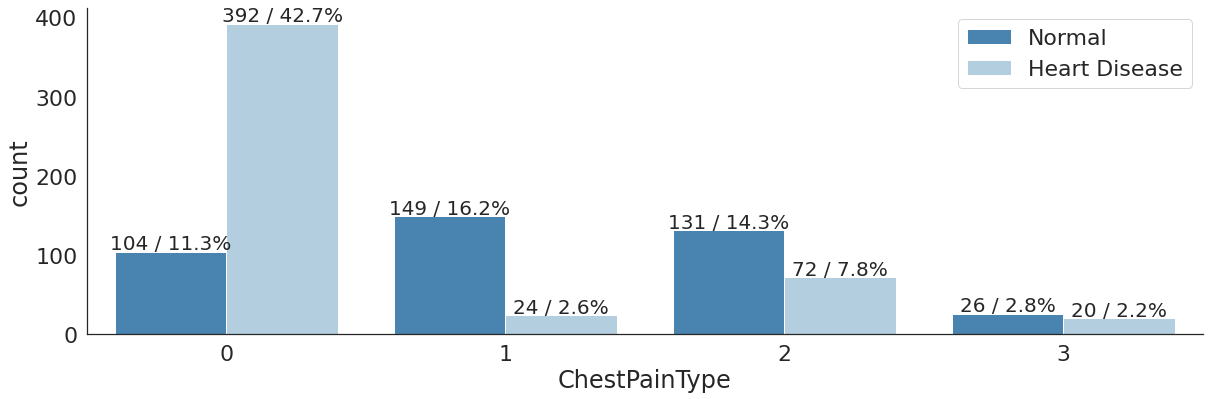

In [10]:
#CHEST PAIN TYPE
# 0:ASY, 1:ATA, 2:NAP, 3:TA
total_cnt = dataset['HeartDisease'].count()
plt.figure(figsize=(20,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=dataset, x='ChestPainType',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

**Observació:** Els pacients asimptomàtics són els que majoritariament són diagnosticats amb malalties cardíaques.

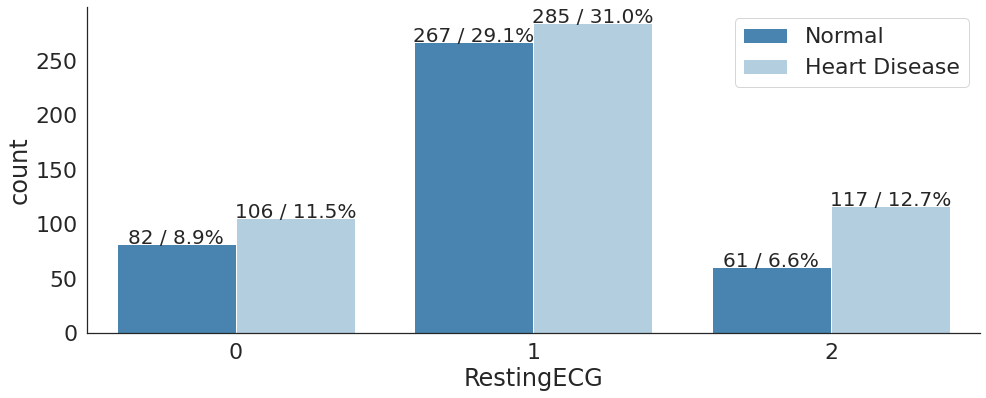

In [11]:
#RestingEGC
#0:LVH, 1:Normal, 2:ST
total_cnt = dataset['HeartDisease'].count()
plt.figure(figsize=(16,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=dataset, x='RestingECG',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 5, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

Observació: 

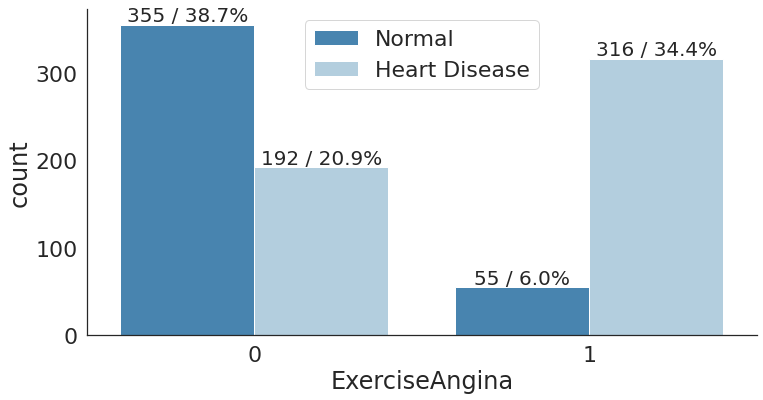

In [12]:
#EXERCIE ANGINA
#0:N, 1:Y
total_cnt = dataset['HeartDisease'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=dataset, x='ExerciseAngina',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

**Observació:** La malaltia cardíaca sovint es diagnostica quan hi ha angina de pit induïda per l'exercici

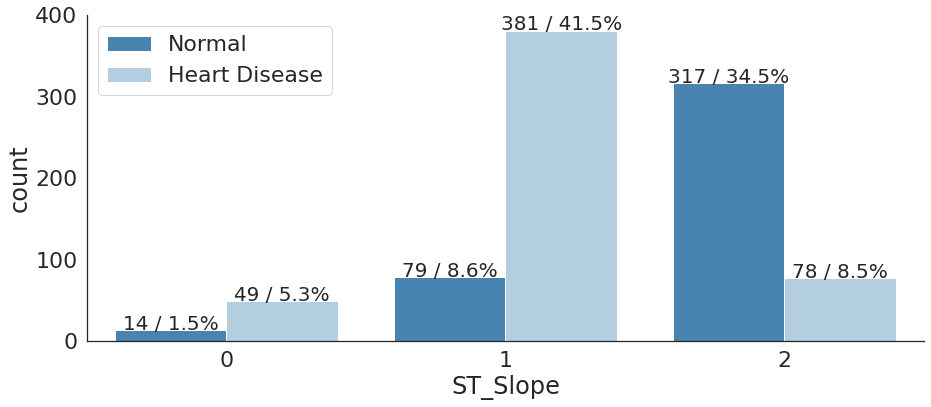

In [13]:
#ST_Slope
#0:Down, 1:Flat, 2:Up
total_cnt = dataset['HeartDisease'].count()
plt.figure(figsize=(15,6))
sns.set(font_scale = 2)
plt.subplots_adjust(wspace=0.3)
sns.set_style("white")
ax = sns.countplot(data=dataset, x='ST_Slope',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 7, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

**Observació:** Quan ST_Slope és Up, sovint es diagnostica com a normal. En canvi, si aquest és Flat o Down, solen ser diagnosticats amb una malaltia cardíaca.

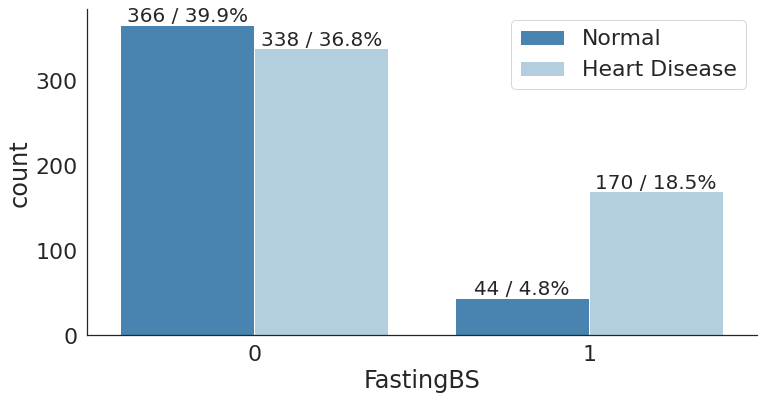

In [14]:
#FastingBS
total_cnt = dataset['HeartDisease'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=dataset, x='FastingBS',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

A continuació, anem a analitzar els atributs numérics en relació a si són diagnosticats de una malaltia cardíaca o no.

In [15]:
def plot_histgram(feature):    
    fig = px.histogram(dataset, x=feature,
                       color="HeartDisease", 
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )  
    fig.update_layout(
        title_font_color="white",
        #legend_title_font_color="yellow",
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        paper_bgcolor="white",
        plot_bgcolor='white',
        font_color="black"
    )
    fig.show()
  
  

In [16]:
def display_stat(feature):
    mean = dataset[feature].mean()
    std = dataset[feature].std()
    skew = dataset[feature].skew()
    kurtosis = dataset[feature].kurtosis()
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

In [17]:
#AGE
plot_histgram('Age')
display_stat('Age')

mean: 53.5109, std: 9.4326, skew: -0.1959, kurtosis: -0.3861 


**Observació:** La mitjana d'edat de les persones diagnosticades amb malalties del cor és de 57 anys, que és més gran que el valor mitjà de les persones normals.

In [18]:
#RestingBP
plot_histgram('RestingBP')
display_stat('RestingBP')

mean: 132.3965, std: 18.5142, skew: 0.1798, kurtosis: 3.2713 


**Observació:** A la figura anterior, hi ha un valor de 0. Si la pressió arterial és 0, en realitat no és possible, de manera que és probable que sigui un outlier.

In [19]:
#Anem a canviar el outlier per el valor mitjà.
dataset['RestingBP'].replace(0, dataset['RestingBP'].median(),inplace=True)


In [20]:
plot_histgram('RestingBP')
display_stat('RestingBP')


mean: 132.5381, std: 17.9901, skew: 0.6080, kurtosis: 0.7962 


**Observació:** S'han eliminat els outliers.

In [21]:
#CHOLESTEROL
plot_histgram('Cholesterol')
display_stat('Cholesterol')

mean: 198.7996, std: 109.3841, skew: -0.6101, kurtosis: 0.1182 


**Observació:** A la figura anterior, hi ha valors que són 0. Si el colesterol sèric és 0, no és possible a la pràctica, de manera que és probable que sigui un outlier.

In [22]:
#Anem a canviar el outlier per el valor mitjà.
dataset['Cholesterol'].replace(0, dataset['Cholesterol'].median(),inplace=True)

In [23]:
plot_histgram('Cholesterol')
display_stat('Cholesterol')

mean: 240.5817, std: 53.9830, skew: 1.5374, kurtosis: 6.2441 


**Observació:** S'han eliminat els outliers.

In [24]:
#MaxHR
plot_histgram('MaxHR')
display_stat('MaxHR')

mean: 136.8094, std: 25.4603, skew: -0.1444, kurtosis: -0.4482 


**Observació:** No es veuen outliers, i la distribució dels valors és raonable.

In [25]:
#OLDPEAK
plot_histgram('Oldpeak')
display_stat('Oldpeak')

mean: 0.8874, std: 1.0666, skew: 1.0229, kurtosis: 1.2031 


In [26]:
#mirem la seva correlació amb la resta de atributs.

dataset.corr()['HeartDisease'].sort_values()

ST_Slope         -0.558771
MaxHR            -0.400421
ChestPainType    -0.386828
Cholesterol       0.042988
RestingECG        0.057384
RestingBP         0.117798
FastingBS         0.267291
Age               0.282039
Sex               0.305445
Oldpeak           0.403951
ExerciseAngina    0.494282
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

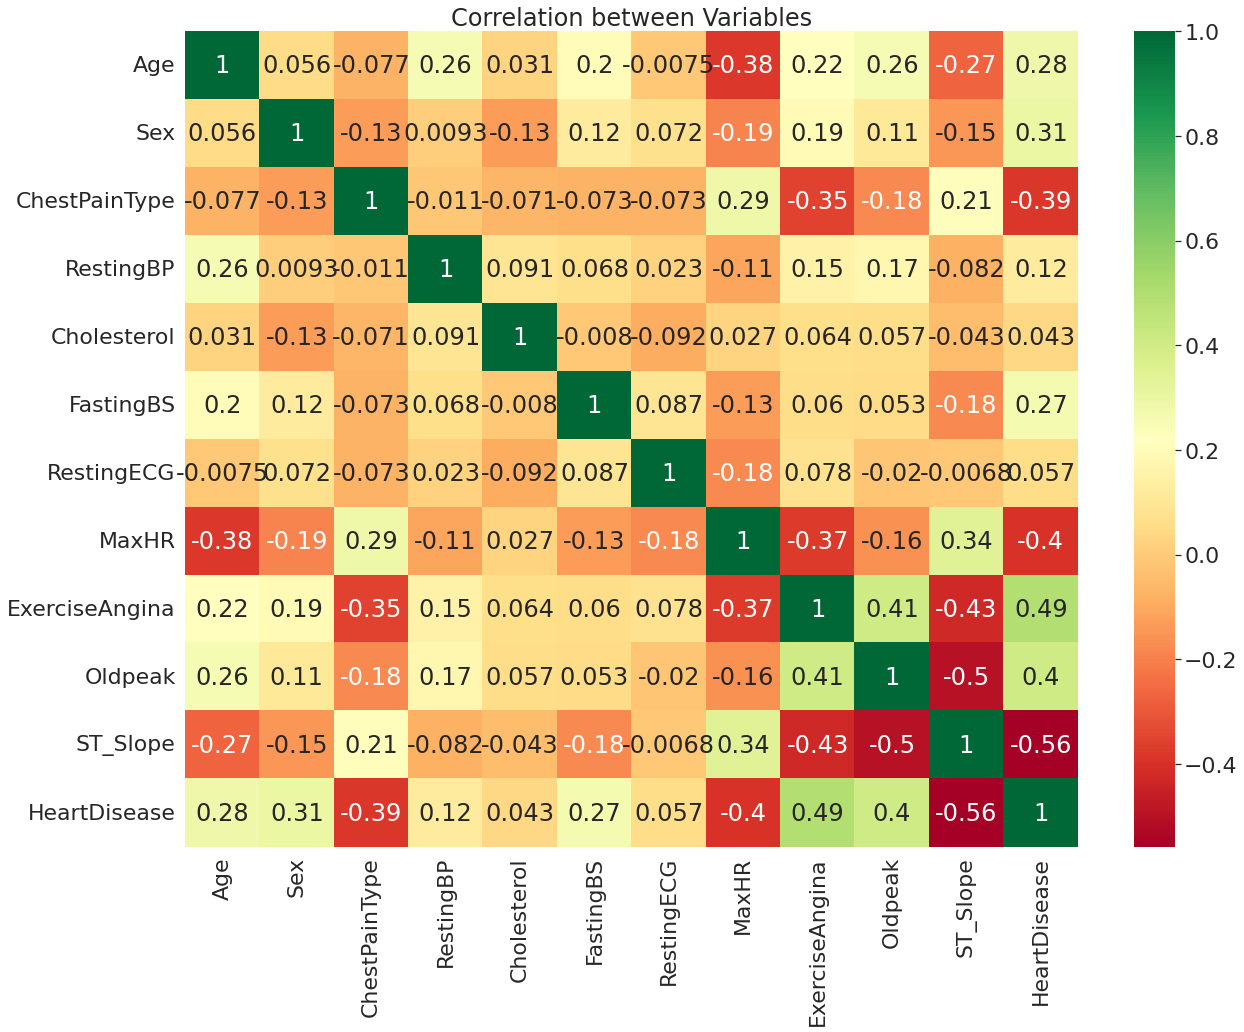

In [27]:
#plotejem les correlacions
import seaborn as sns
plt.figure(figsize=(20, 15))
sns.heatmap(dataset.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [28]:
#dividim les dades en train i test
X = dataset.drop('HeartDisease', axis = 1)
y = dataset['HeartDisease']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
print("Dimensionalitat de les entrades X de train", X_train.shape)
print("Dimensionalitat de l'atribut Y de train", y_train.shape)
print("Dimensionalitat de les entrades X de test", X_test.shape)
print("Dimensionalitat de l'atribut Y de test", y_test.shape)

Dimensionalitat de les entrades X de train (826, 11)
Dimensionalitat de l'atribut Y de train (826,)
Dimensionalitat de les entrades X de test (92, 11)
Dimensionalitat de l'atribut Y de test (92,)


In [30]:
# Ara anem a estanderitzar les dades
scaler=StandardScaler()
scaler.fit(X_train)

mean = scaler.mean_
stnd_deviation = scaler.scale_

In [31]:
scaler_train=scaler.transform(X_train)
scaler_test=scaler.transform(X_test)

# Regressor Logístic


In [32]:
models = []
acc_models = []

In [33]:
start = time.time()

Lr_model = LogisticRegression()
Lr_model.fit(scaler_train, y_train)

end = time.time()

y_predict1 = Lr_model.predict(scaler_test)
acc1 = accuracy_score(y_test, y_predict1)
acc_models.append(acc1)
models.append("Reg. logística")

print("Accuracy:",acc1)
print("Temps:",end-start)

Accuracy: 0.8478260869565217
Temps: 0.014866113662719727


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



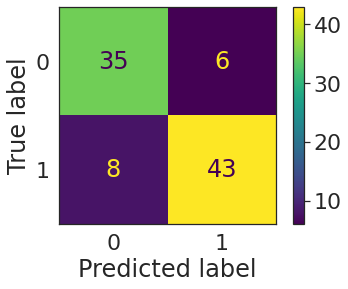

In [34]:
plot_confusion_matrix(Lr_model, scaler_test, y_test)

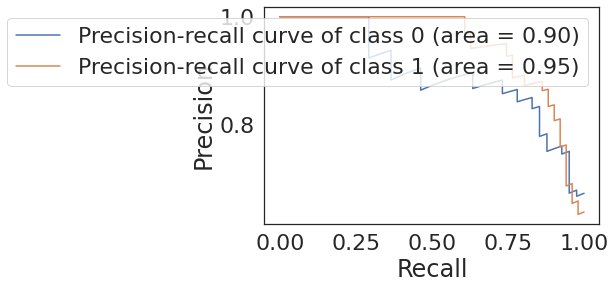

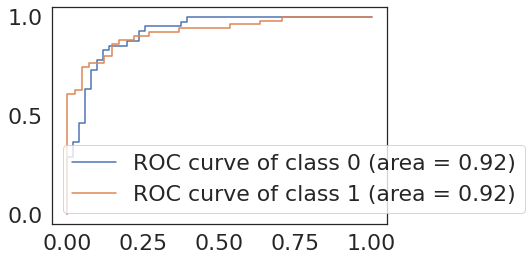

In [35]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

n_classes = 2
probs = Lr_model.predict_proba(scaler_test)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()


# SVC

In [36]:
start = time.time()

svc = SVC(random_state=2)
svc.fit(scaler_train, y_train)

end = time.time()

y_predict2 = svc.predict(scaler_test)
acc2 = accuracy_score(y_test, y_predict2)
acc_models.append(acc2)
models.append("SVC")

print("Accuracy:",acc2)
print("Time:",end-start)

Accuracy: 0.8695652173913043
Time: 0.03007197380065918


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



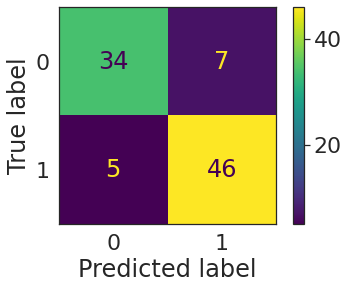

In [37]:
plot_confusion_matrix(svc, scaler_test, y_test)

# Random Forest

In [38]:
strat = time.time()

RF = RandomForestClassifier(max_depth=25, random_state=0,n_estimators= 1200) 
RF.fit(scaler_train, y_train)

end = time.time()

y_predict3 = RF.predict(scaler_test)
acc3 = accuracy_score(y_test, y_predict3)
acc_models.append(acc3)
models.append("Random forest")

print("Accuracy",acc3)
print("Time:",end-start)

Accuracy 0.8478260869565217
Time: 9.35115671157837


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



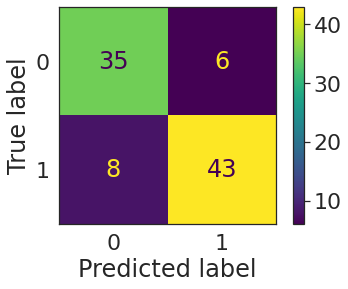

In [39]:
plot_confusion_matrix(RF, scaler_test, y_test)

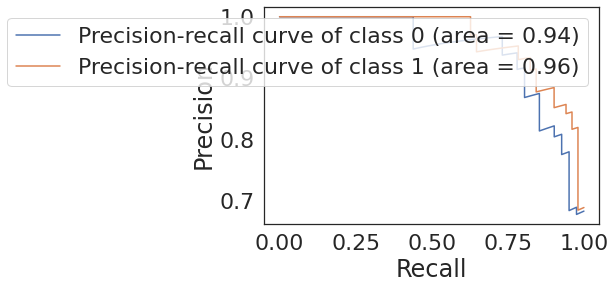

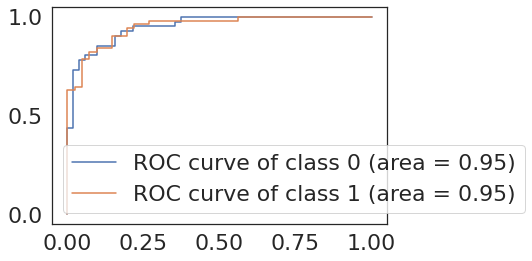

In [40]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

n_classes = 2
probs = RF.predict_proba(scaler_test)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

# XGBOOST

In [41]:
start = time.time()

xg = XGBClassifier()
xg.fit(scaler_train, y_train)

end = time.time()

y_predict4 = xg.predict(scaler_test)
acc4 = accuracy_score(y_test, y_predict4)
acc_models.append(acc4)
models.append("XGBoost")

print("Accuracy:",acc4)
print("Time:",end-start)

Accuracy: 0.8586956521739131
Time: 0.16100692749023438


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



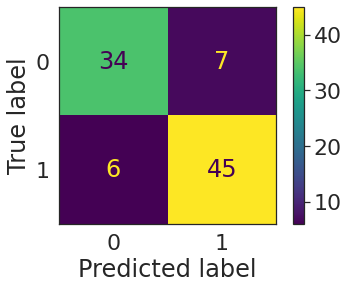

In [42]:
plot_confusion_matrix(xg, scaler_test, y_test)

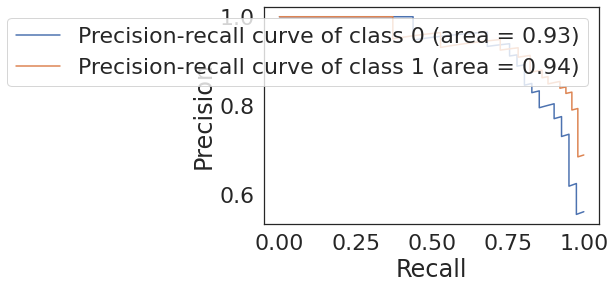

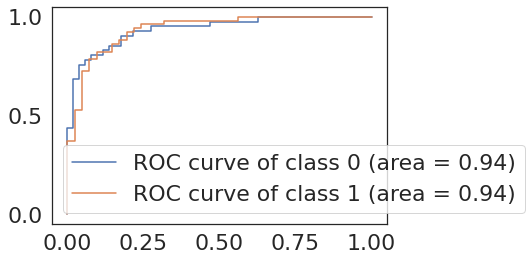

In [43]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

n_classes = 2
probs = xg.predict_proba(scaler_test)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

# Decission Tree

In [44]:
start = time.time()

decision_tree = DecisionTreeClassifier(max_depth=13, random_state=42) 
decision_tree.fit(scaler_train, y_train)

end = time.time()

y_predict4 = decision_tree.predict(scaler_test)
acc4 = accuracy_score(y_test, y_predict4)
acc_models.append(acc4)
models.append("Decision tree")

print("Accuracy",acc4)
print("Time:",end-start)

Accuracy 0.8152173913043478
Time: 0.00399470329284668


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



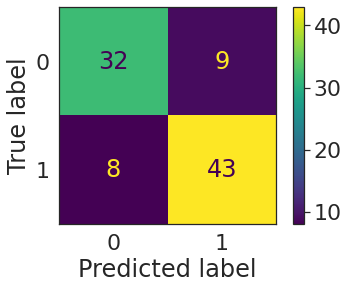

In [45]:
plot_confusion_matrix(decision_tree, scaler_test, y_test)

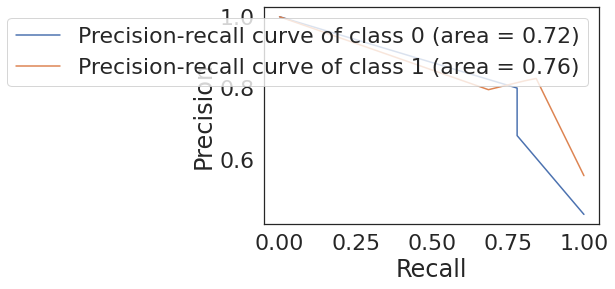

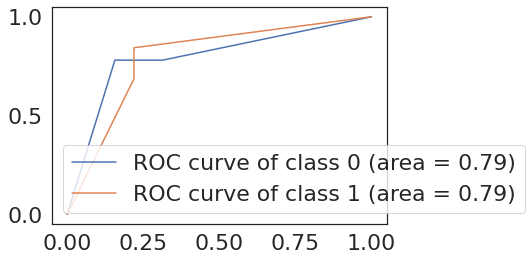

In [46]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

n_classes = 2
probs = decision_tree.predict_proba(scaler_test)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

# KNN

In [47]:

start = time.time()

knn = KNeighborsClassifier()
knn.fit(scaler_train, y_train)

end = time.time()

y_predict5 = knn.predict(scaler_test)
acc5 = accuracy_score(y_test, y_predict5)
acc_models.append(acc5)
models.append("KNN")

print("Accuracy:",acc5)
print("Time:",end-start)

Accuracy: 0.8478260869565217
Time: 0.006783485412597656


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



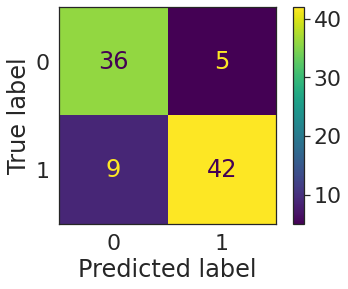

In [48]:
plot_confusion_matrix(knn, scaler_test, y_test)

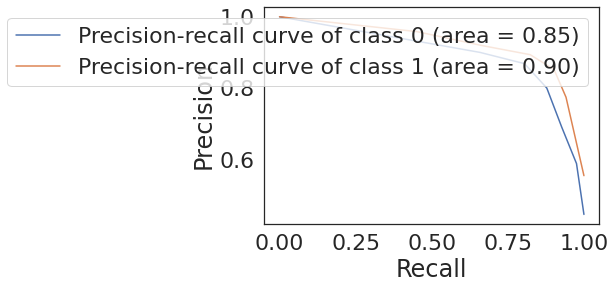

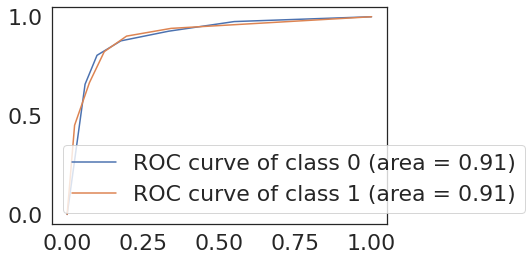

In [49]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

n_classes = 2
probs = knn.predict_proba(scaler_test)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

Text(0.5, 1.0, 'Accuracy dels diferents models provats')

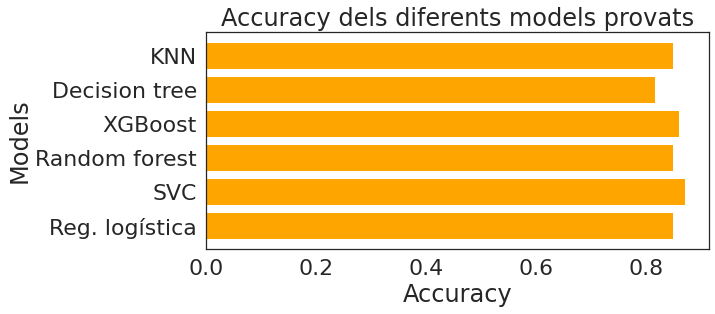

In [50]:
# Anem a comparar el resultat dels accuracys dels diferents models
plt.figure(figsize=(9,4))
plt.barh(models,acc_models, color = 'orange')
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Accuracy dels diferents models provats')

In [51]:
# Anem a provar de fer un   PCA amb el SVC

accuracys = []
for i in range(1,12):
    pca = PCA(i)
    pca_x = pca.fit_transform(scaler_train)
    
    linear_model =  XGBClassifier()
    linear_model.fit(pca_x, y_train)
    preds = linear_model.predict(pca_x)

    acc = accuracy_score(preds, y_train)   
    accuracys.append(acc)
    

In [52]:
for i in range(0,11):
    print(f"PCA_{i+1} - accuracy: {accuracys[i]:.3f}")

PCA_1 - accuracy: 0.837
PCA_2 - accuracy: 0.854
PCA_3 - accuracy: 0.869
PCA_4 - accuracy: 0.889
PCA_5 - accuracy: 0.903
PCA_6 - accuracy: 0.913
PCA_7 - accuracy: 0.919
PCA_8 - accuracy: 0.930
PCA_9 - accuracy: 0.927
PCA_10 - accuracy: 0.935
PCA_11 - accuracy: 0.942


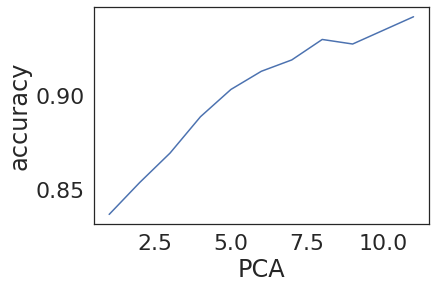

In [53]:
plt.figure()
plt.xlabel("PCA")
plt.ylabel("accuracy")
plt.plot([1,2,3,4,5,6,7,8,9,10,11],accuracys)

In [56]:
# Guardem el classificador XGBoost i la mitja i la desviació estàndard de les dades d'entrenament

joblib.dump(xg,'classificador.pkl')
joblib.dump(mean,'mean.pkl')
joblib.dump(stnd_deviation,'desviacio_estandard.pkl')

['desviacio_estandard.pkl']